#Assignment 1: Logistic Regression

## Dataset load & Plot

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

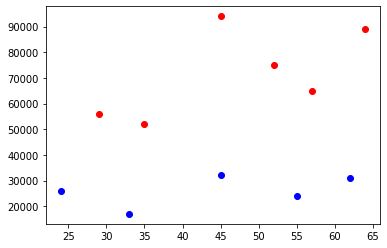

In [41]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
plt.show()

# Problem 1-1. Logistic regression model using sklearn packages.

Train your data using LogisticRegression classes from skikit-learn library.


In [42]:
def learn_and_return_weights(X, y):
    from sklearn.linear_model import LogisticRegression

    logireg = LogisticRegression(C=500.0)
    logireg.fit(X, y)
    w = logireg.coef_.reshape(2,-1)
    b = logireg.intercept_

    
    return w, b

[[-5.68076256e+00]
 [ 5.06951001e-03]] [-0.13084931]


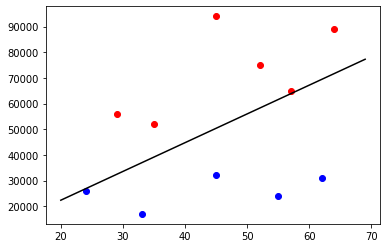

In [43]:
def plot_data_and_weights(X, y, w, b):

    print(w, b)
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

    x_lin = np.arange(20, 70)
    y_lin = -(0.5 + b + w[0] * x_lin) / w[1]

    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 1-2. Implement Logistic Regression Model

Implement Logistic Regression without using scikit-learn libraries.


In [44]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def binary_cross_entropy_loss(y_pred, target): 
    return np.sum(-1 * target * np.log(y_pred) + (target-1)*np.log(1 - y_pred)).mean()

def learn_and_return_weights_numpy(X, Y, lr=.02, iter=300000):
    Y = Y.reshape([-1, 1])
    W = np.random.rand(2, 1)
    b = np.random.rand(1)
    for i in range(iter): 
      h = sigmoid(np.dot(X, W)+b)
      e = binary_cross_entropy_loss(h, Y)
      g = np.dot(X.T, h-Y)/Y.size
      W = W - lr*g
    return W, b

[[-4.11212237e+02]
 [ 3.69979357e-01]] [0.26220262]


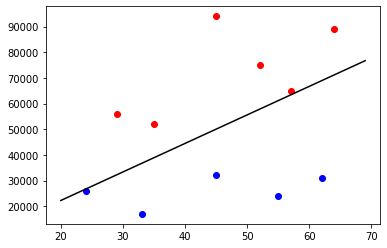

In [45]:
w, b = learn_and_return_weights_numpy(X, y)
plot_data_and_weights(X, y, w, b)